WEASEL+MUSE stand for Word ExtrAction for time SEries cLassification plus Multivariate Unsupervised Symbols and dErivatives. This example shows how the WEASEL+MUSE algorithm transforms multivariate time series of real numbers into a sequence of frequencies of words. It is implemented as pyts.multivariate.transformation.WEASELMUSE.

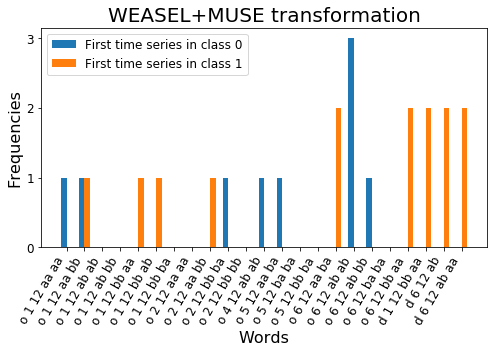

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_basic_motions
from pyts.multivariate.transformation import WEASELMUSE
from sklearn.preprocessing import LabelEncoder

# Toy dataset
X_train, _, y_train, _ = load_basic_motions(return_X_y=True)
y_train = LabelEncoder().fit_transform(y_train)

# WEASEL+MUSE transformation
transformer = WEASELMUSE(word_size=2, n_bins=2, window_sizes=[12, 36],
                         chi2_threshold=15, sparse=False)
X_weasel = transformer.fit_transform(X_train, y_train)

# Visualize the transformation for the first time series
plt.figure(figsize=(8, 5))
vocabulary_length = len(transformer.vocabulary_)
width = 0.3
plt.bar(np.arange(vocabulary_length) - width / 2, X_weasel[y_train == 0][0],
        width=width, label='First time series in class 0')
plt.bar(np.arange(vocabulary_length) + width / 2, X_weasel[y_train == 1][0],
        width=width, label='First time series in class 1')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(transformer.vocabulary_.get)(
               np.arange(X_weasel[0].size)),
           fontsize=12, rotation=60, ha='right')
y_max = np.max(np.concatenate([X_weasel[y_train == 0][0],
                               X_weasel[y_train == 1][0]]))
plt.yticks(np.arange(y_max + 1), fontsize=12)
plt.xlabel("Words", fontsize=16)
plt.ylabel("Frequencies", fontsize=16)
plt.title("WEASEL+MUSE transformation", fontsize=20)
plt.legend(loc='best', fontsize=12)

plt.subplots_adjust(bottom=0.27)
plt.show()

This example shows how the BOSSVS algorithm transforms a dataset consisting of time series and their corresponding labels into a document-term matrix using tf-idf statistics. Each class is represented as a tfidf vector. For an unlabeled time series, the predicted label is the label of the tfidf vector giving the highest cosine similarity with the tf vector of the unlabeled time series. BOSSVS algorithm is implemented as pyts.classification.BOSSVS.

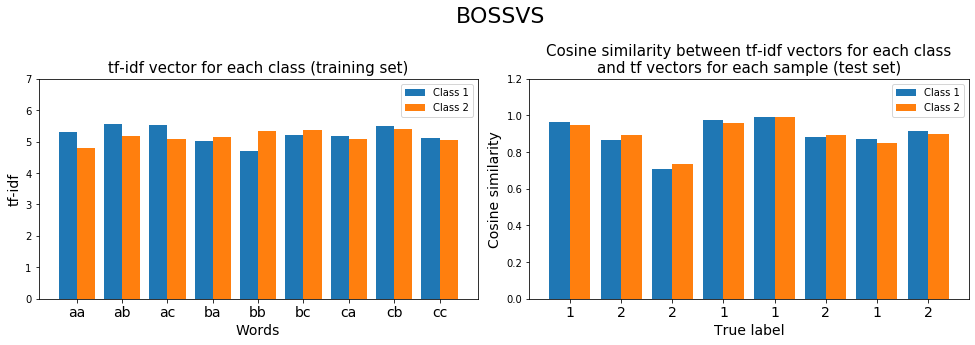

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.classification import BOSSVS
from pyts.datasets import load_gunpoint

# Toy dataset
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

# BOSSVS transformation
bossvs = BOSSVS(word_size=2, n_bins=3, window_size=10)
bossvs.fit(X_train, y_train)
tfidf = bossvs.tfidf_
vocabulary_length = len(bossvs.vocabulary_)
X_new = bossvs.decision_function(X_test)

# Visualize the transformation
plt.figure(figsize=(14, 5))
width = 0.4

plt.subplot(121)
plt.bar(np.arange(vocabulary_length) - width / 2, tfidf[0],
        width=width, label='Class 1')
plt.bar(np.arange(vocabulary_length) + width / 2, tfidf[1],
        width=width, label='Class 2')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(bossvs.vocabulary_.get)(np.arange(vocabulary_length)),
           fontsize=14)
plt.ylim((0, 7))
plt.xlabel("Words", fontsize=14)
plt.ylabel("tf-idf", fontsize=14)
plt.title("tf-idf vector for each class (training set)", fontsize=15)
plt.legend(loc='best')

plt.subplot(122)
n_samples_plot = 8
plt.bar(np.arange(n_samples_plot) - width / 2, X_new[:n_samples_plot, 0],
        width=width, label='Class 1')
plt.bar(np.arange(n_samples_plot) + width / 2, X_new[:n_samples_plot, 1],
        width=width, label='Class 2')
plt.xticks(np.arange(n_samples_plot), y_test[:n_samples_plot], fontsize=14)
plt.ylim((0, 1.2))
plt.xlabel("True label", fontsize=14)
plt.ylabel("Cosine similarity", fontsize=14)
plt.title(("Cosine similarity between tf-idf vectors for each class\n"
           "and tf vectors for each sample (test set)"), fontsize=15)
plt.legend(loc='best')

plt.suptitle("BOSSVS", y=0.95, fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

In [8]:
X_train.shape

(50, 150)